# Demo code to apply facial morphings
If you find this work helpful, please cite:

V. Vonikakis, D. Neo and S. Winkler, “MorphSet: Augmenting categorical emotion datasets with dimensional affect labels using face morphing,” in Proc. IEEE Int’l Conf. Image Processing (ICIP), Alaska, Sep. 19–22, 2021

In [42]:
# imports
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
import os

from utils import applyAffineTransform, morphTriangle, extract_index_nparray, get_landmarks, delaunay_triangulation
from align_image import align_image

e2e = 150
N = 10
alpha_values = np.linspace(0,1,N)

## Augmentation Function

In [43]:
def generate_images(src, dst, src_points, dst_points):

    dst_gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
    dst_face_mask = np.zeros_like(img2_gray)
    dst_new_face = np.zeros_like(img2)

    idx_triangles1 = delaunay_triangulation(src_points)

    for count, alpha in enumerate(alpha_values):

        imgMorph = np.zeros(src.shape, dtype=src.dtype)

        # Compute weighted average point coordinates
        points = []
        for i in range(0, len(src_points)):
            x = ( 1 - alpha ) * src_points[i][0] + alpha * dst_points[i][0]
            y = ( 1 - alpha ) * src_points[i][1] + alpha * dst_points[i][1]
            points.append((x,y))

        for v1, v2, v3 in idx_triangles1 :
                        
            t1 = [src_points[v1], src_points[v2], src_points[v3]]
            t2 = [dst_points[v1], dst_points[v2], dst_points[v3]]
            t = [ points[v1],  points[v2],  points[v3]]

            # Morph one triangle at a time.
            morphTriangle(src, dst, imgMorph, t1, t2, t, alpha)


        dst_new_face_gray = cv2.cvtColor(imgMorph, cv2.COLOR_BGR2GRAY)
        _, background = cv2.threshold(dst_new_face_gray, 1, 255, cv2.THRESH_BINARY_INV)
    
        background = cv2.bitwise_or(dst, dst, mask=background)
    
        result = cv2.add(background, imgMorph)
    
        # perform seamless clone
        convexhull2 = cv2.convexHull(points1) #create outline from points
        dst_head_mask = cv2.fillConvexPoly(dst_face_mask, convexhull2, 255)
        (x3, y3, w3, h3) = cv2.boundingRect(convexhull2)

        center = (int((x3 + x3 + w3) / 2), int((y3 + y3 + h3) / 2))

        seamlessclone = cv2.seamlessClone(result, dst, dst_head_mask, (center), cv2.NORMAL_CLONE)
        seamlessclone = cv2.cvtColor(seamlessclone, cv2.COLOR_BGR2RGB)
    
        axs[count].imshow(seamlessclone)
        axs[count].axis("off")

## Read, detect and align sample images

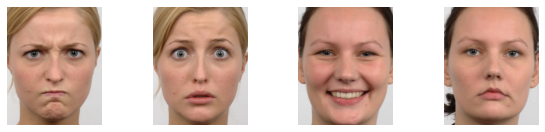

In [44]:
#Using dlib face detector and landmarks predictor  
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("./shape_predictor_68_face_landmarks.dat")

images = {}
landmarks = {}

plt.figure(figsize=(10,10))
for i, item in enumerate(sorted(os.listdir('./images'))):
    img = cv2.imread('./images/' + item)
    _, landmarks_points = get_landmarks(img, detector, predictor) #pass to detector
    img, points = align_image(landmarks_points, img, e2e) 
    
    images[i] = img
    landmarks[i] = points
    
    plt.subplot(4,4,i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")

# Generate intensity morphings
Applying morphing to obtain augmented images (From Neutral expression --> Apex expression)

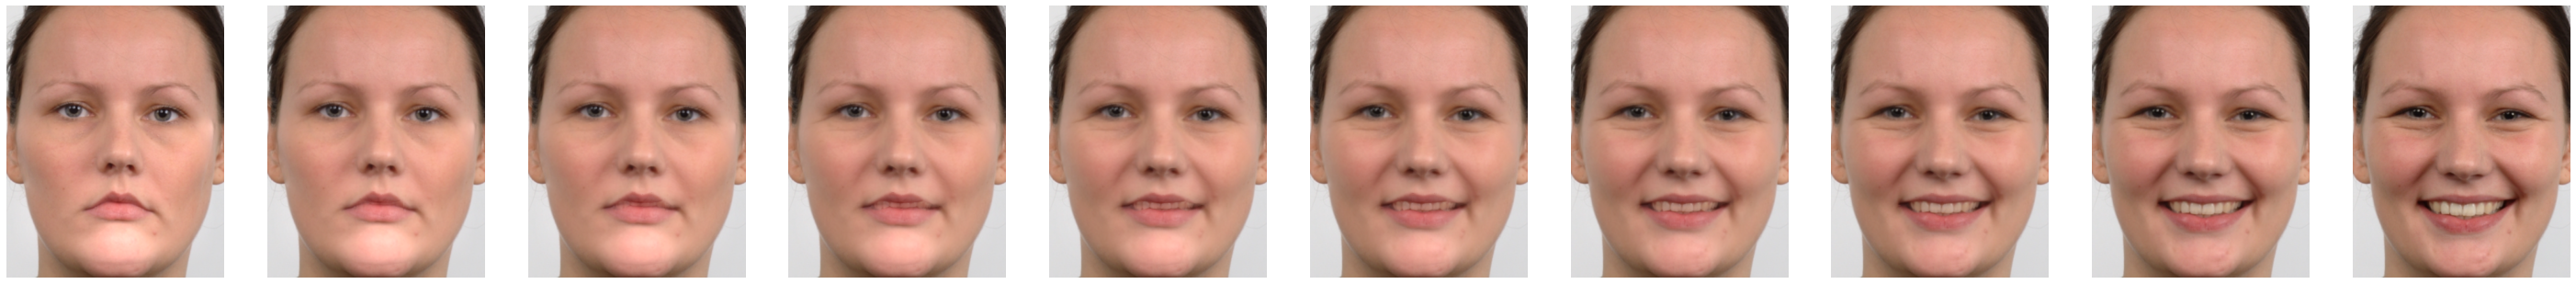

In [45]:
f, axs = plt.subplots(1, N , figsize=(50,50))   
generate_images(images[3], images[2], landmarks[3], landmarks[2])

# Generate expression morphings
Applying morphing to obtain augmented images (From Apex1 expression --> Apex2 expression)

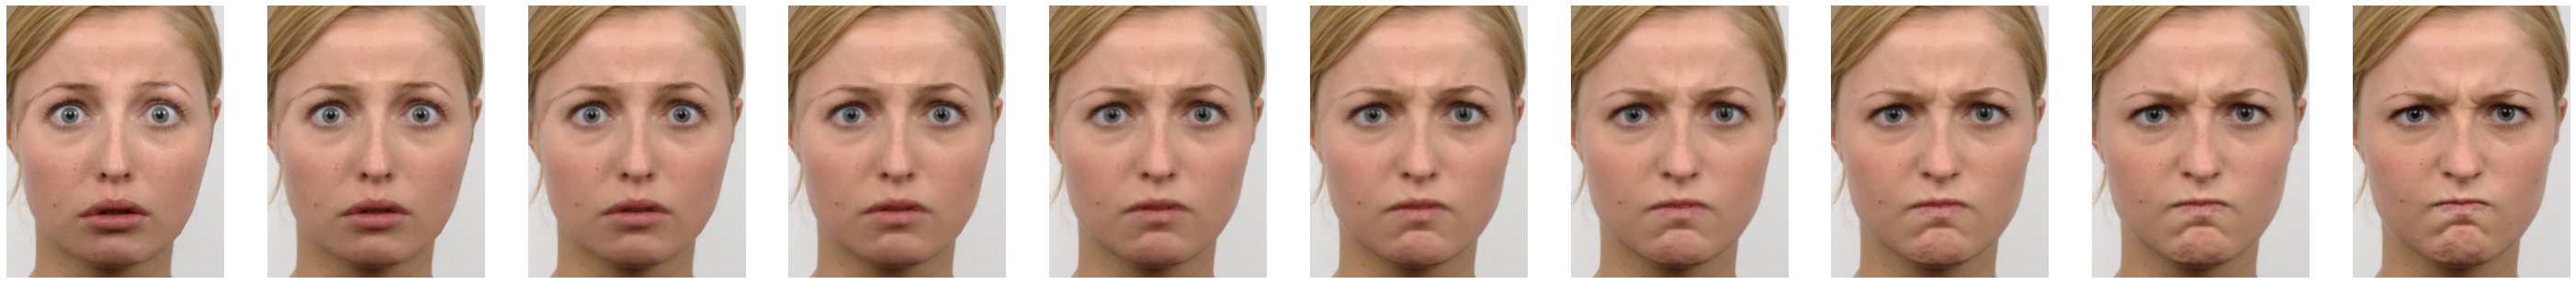

In [46]:
f, axs = plt.subplots(1, N , figsize=(50,50))   
generate_images(images[1], images[0], landmarks[1], landmarks[0])